# [NTDS'18] milestone 2: network models
[ntds'18]: https://github.com/mdeff/ntds_2018

[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: `10`
* Students: `<the name of all students in the team>`
* Dataset: `<the dataset you used to complete the milestone>`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* In the first part, you cannot import any other library than we imported. In the second part, you are allowed to import any library you want.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The purpose of this milestone is to explore various random network models, analyse their properties and compare them to your network. In the first part of the milestone you will implement two random graph models and try to fit them to your network. In this part you are not allowed to use any additional package. In the second part of the milestone you will choose a third random graph model that you think shares some properties with your network. You will be allowed to use additional packages to construct this network, but you must explain your network choice. Finally, make your code as clean as possible, and keep your textual answers short.

## Part 0

Import the adjacency matrix of your graph that you constructed in milestone 1, as well as the number of nodes and edges of your network.

In [2]:
adjacency =  np.load("../saved_adjacency.npy")
n_nodes =  len(adjacency)
n_edges =  int(sum(sum(adjacency > 0))/2)

## Part 1

**For the computation of this part of the milestone you are only allowed to use the packages that have been imported in the cell below.**

In [1]:
%matplotlib inline

import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

import networkx as nx
import pygsp

### Question 1

Create a function that constructs an Erdős–Rényi graph.

In [3]:
def erdos_renyi(n, p, seed=None):
    """Create an instance from the Erdos-Renyi graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    p: float
        Edge probability. A number between 0 and 1.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    # Initializing "adjacency" as an empty n x n matrix
    adjacency = np.zeros((n,n))
    # Initializing the random number generation with the desired seed
    random.seed(seed)
    
    
    for i in range(n):
        for j in range(i+1, n, 1):
            # If the generated number (between 0 and 1) is smaller than the probability, an edge is created
            if (random.random() < p):
                adjacency[i,j]=adjacency[j,i]=1
    
    
    return adjacency

Text(0.5, 1.05, 'Erdos-Renyi (5, 0.6)')

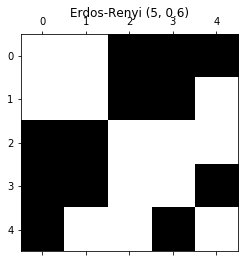

In [4]:
er = erdos_renyi(5, 0.6, 9765)
plt.spy(er)
plt.title('Erdos-Renyi (5, 0.6)')

Text(0.5, 1.05, 'Erdos-Renyi (10, 0.4)')

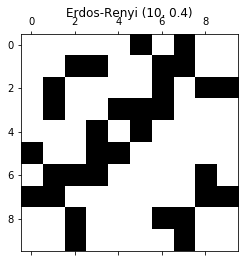

In [5]:
er = erdos_renyi(10, 0.4, 7648)
plt.spy(er)
plt.title('Erdos-Renyi (10, 0.4)')

### Question 2

Use the function to create a random Erdos-Renyi graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

Text(0.5, 1.05, 'ER NetworkX (20, 0.4)')

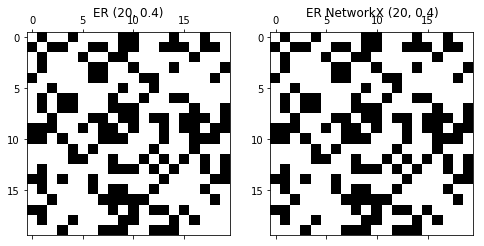

In [6]:
# Your code here.
er = erdos_renyi(20, 0.4,1)
plt.figure(figsize=(8,8))
plt.subplot(121)
plt.spy(er)
plt.title('ER (20, 0.4)')

er = nx.erdos_renyi_graph(20,0.4,1)
er = nx.to_numpy_matrix(er)
plt.subplot(122)
plt.spy(er)
plt.title('ER NetworkX (20, 0.4)')

In [7]:
# Binarization of adjacency matrix
adjacency=np.where(adjacency != 0, 1, 0)

# L max is equal to the number of distinct pair of nodes present in the graph
L_max=int(n_nodes*(n_nodes-1)/2)
print('L_max = ',L_max)

print('Our Network:')
# To compute L, we need to count how many non-zero elements there are in the top-right half of the adjacency matrix
L_net=np.sum(adjacency)/2
print('L_net =',L_net)

# Computing the density of our network which represents the probability in the Erdos-Renyi model
L_Prob = L_net/L_max

print('Link probability = ',L_Prob)

## 15 is a good seed with 163664 links
er=erdos_renyi(n_nodes, L_Prob)
print('Random Network:')

L_er=int(np.sum(er)/2)
print('L_er =',L_er)

# Densitiy of the Erdos-Renyi graph
print('Link probability = ',L_er/L_max)

L_max =  4921953
Our Network:
L_net = 163621.0
Link probability =  0.03324310492196898
Random Network:
L_er = 163461
Link probability =  0.03321059750062628


**Your answer here.**

### Question 3

Create a function that constructs a Barabási-Albert graph.

In [ ]:
def barabasi_albert(n, m, m0=2, seed=None):
    """Create an instance from the Barabasi-Albert graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    m: int
        Number of edges to attach from a new node to existing nodes.
    m0: int (optional)
        Number of nodes for the inital connected network.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    
    # Initializing random seed
    random.seed(seed)
    # Empty adjacency matrix to fill
    adjacency = np.zeros((n,n))
 
    # List of already connected nodes: Nodes with X connections will appear X times (Preferential attachment)
    connected = []

    # Set of nodes to_connect to (use of set to avoid multiple links between two nodes)
    # Loop to connect the initial network as a randomly connected path graph
    initial = list(range(m0))
    random.shuffle(initial)
    for i in range(len(initial)-1):
        adjacency[initial[i], initial[i+1]] = 1
        adjacency[initial[i+1], initial[i]] = 1
        connected.extend([initial[i], initial[i+1]])
        
    # Set of nodes to_connect to (use of set to avoid multiple links between two nodes)
    to_connect = set()
    
    # Particular case where m0=1 and therefore "connected" is empty
    if m0==1:
        to_connect.add(0)
    
    while len(to_connect) < m:
        to_connect.add(random.choice(connected))
        
    to_connect = set(range(m))

    # Index of the first node to add to the network
    selected = m
    
    while selected < n :
        # Creation of links between the "selected" node and the "to_connect" one(s)
        for node in to_connect:
            adjacency[selected, node]=1
            adjacency[node, selected]=1
        
        # Indexes of nodes connected on the above operation are added to the "connected" list
        connected.extend(list(to_connect))
        # Selected node is added m times on the list since m new links are created
        connected.extend([selected for i in range(m)])
        
        # Reset of set
        to_connect=set()
        
        # Searching for m different randomly chosen node "to_connect" to
        while len(to_connect) < m:
            to_connect.add(random.choice(connected))
        
        selected+=1
    
    return adjacency

In [ ]:
ba = barabasi_albert(5, 1, 2, 9087)
plt.spy(ba)
plt.title('Barabasi-Albert (5, 1)')

In [ ]:
ba = barabasi_albert(10, 2, 3, 8708)
plt.figure(figsize=(8,8))
plt.subplot(121)
plt.spy(ba)
plt.title('Barabasi-Albert (10, 2)')

#ba = nx.barabasi_albert_graph(10,2,8708)
#ba = nx.to_numpy_matrix(ba)
#plt.subplot(121)
#plt.spy(ba)
#plt.title('Barabasi-Albert NetworkX (10, 2)')

from pygsp import graphs
import matplotlib.pyplot as plt
G = graphs.BarabasiAlbert(10,3,2,8708)

plt.subplot(122)
plt.spy(G.W, markersize=15)

### Question 4

Use the function to create a random Barabási-Albert graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

In [ ]:
# Your code here.
# L max is equal to the number of distinct pair of nodes present in the graph
L_max=int(n_nodes*(n_nodes-1)/2)
print('L_max = ',L_max)

print('Our Network:')
print('L_net =',L_net)

m_1 = (n_nodes+(3031.92348))/2
m_2 = (n_nodes-(3031.92348))/2

print("m 1:", m_1, "m 2:", m_2)

print("B/A Model with m=53:")
ba = barabasi_albert(n=n_nodes, m=53)

L_ba = sum(sum(ba))/2
print('L_ba =',L_ba)

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(121)
plt.spy(adjacency)
#plt.title('Barabasi-Albert (10, 2)')

ba = nx.barabasi_albert_graph(n_nodes, 53)
ba = nx.to_numpy_matrix(ba)
plt.subplot(122)
plt.spy(ba)

**Your answer here**

After the first iteration, the Barabasi/Albert model network has m+1 nodes and m links. After the second one, the network has now m+2 nodes and 2m links. We can assume the final network with n = m+(n-m) nodes has L = (n-m)m links. This last formula gives us a relation between Barbasi/Albert initial parameter m and our network's informations and by solving the following equation, we can determine the optimal parameter:

m^2 - nm + L = 0

Since our network has L = 163621 links and n = 3138 nodes it means the best parameters to fit our network are m_1 = 53 or m_2 = 3085 (163'505 links) to have the same number of links and nodes.

### Question 5

Compare the number of edges in all three networks (your real network, the Erdős–Rényi network, and the Barabási-Albert netowk).

0.9999999999999957

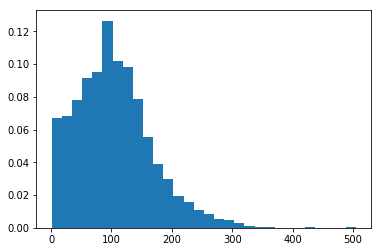

In [8]:
# Your code here.
adjacency=np.where(adjacency != 0, 1, 0)
# We create an array containing the degree of each node
degree = np.sum(adjacency,0)
weights = np.ones_like(degree) / float(n_nodes)
deg=plt.hist(degree,weights=weights,  bins=30);

deg_pdf=np.histogram(degree,bins=30,weights=weights)
sum(deg_pdf[0])

### Question 6

Implement a function that computes the [Kullback–Leibler (KL) divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between two probability distributions.
We'll use it to compare the degree distributions of networks.

In [9]:
def kl_divergence(p, q):
    """Compute the KL divergence between probability distributions of degrees of two networks.
    
    Parameters
    ----------
    p: np.array
        Probability distribution of degrees of the 1st graph.
    q: np.array
        Probability distribution of degrees of the 2nd graph.
    
    Returns
    -------
    kl
        The KL divergence between the two distributions.
    """
    
    # Your code here.
    kl=0.;
    
    for i in range(len(p)):
        if(p[i] and q[i]):
            kl+=p[i]*np.log(p[i]/q[i])
    
    
    return kl

In [11]:
p_test = np.array([0.2, 0.2, 0.2, 0.4])
q_test = np.array([0.3, 0.3, 0.1, 0.3])

#p_test = np.array([0.9, 0.05, 0.05])
#q_test = np.array([0.33333, 0.33333, 0.33333])

print('our function gives :',kl_divergence(p_test, q_test))

print('scipy.stats.entropy gives:',scipy.stats.entropy(p_test,q_test))

our function gives : 0.09151622184943575
scipy.stats.entropy gives: 0.09151622184943575


### Question 7: 

Compare the degree distribution of your network to each of the two synthetic ones, in terms of KL divergence.

**Hint:** Make sure you normalise your degree distributions to make them valid probability distributions.

**Hint:** Make sure none of the graphs have disconnected nodes, as KL divergence will not be defined in that case. If that happens with one of the randomly generated networks, you can regenerate it and keep the seed that gives you no disconnected nodes.

maxDeg: 505 139.0
minDeg: 1 68.0


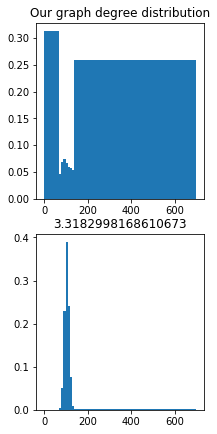

In [12]:
# Your code here.
nb_bins=20
bins=list(range(0,700,nb_bins))
#bins=list(np.unique(np.transpose(np.floor(np.logspace(0,np.log10(700),nb_bins)))))
bi1=[0,70]
bi2=list(range(79,138,10))
bi3=[138,700]
bins=bi1+bi2+bi3


plt.figure(figsize=(3,11))
plt.subplot(311)

plt.title('Our graph degree distribution')
deg_pdf=plt.hist(degree,bins=bins,weights=weights)

er = erdos_renyi(n_nodes, 0.0332431, 15);
#er = erdos_renyi(n_nodes, 0.1, 15);
##ba = barabasi_albert(n_nodes, 53);

deg_er=np.sum(er,0);
##deg_ba=np.sum(ba,0);

plt.subplot(312)

deg_pdf_er=plt.hist(deg_er,bins=bins,weights=weights);
plt.title(kl_divergence(deg_pdf[0],deg_pdf_er[0]))
#plt.title('Erdos-Renyi graph degree distribution')
#plt.title(scipy.stats.entropy(deg_pdf[0],deg_pdf_er[0]))


#plt.subplot(313)
#
#deg_pdf_ba=plt.hist(deg_ba,bins=bins,weights=weights);
#plt.title(kl_divergence(deg_pdf[0],deg_pdf_ba[0]))
#
#kl_divergence(deg_pdf[0],deg_pdf_ba[0]);

print("maxDeg:",max(degree), max(deg_er))#, max(deg_ba))
print("minDeg:",min(degree), min(deg_er))#, min(deg_ba))


### Question 8

Plot the degree distribution historgrams for all three networks. Are they consistent with the KL divergence results? Explain.

In [ ]:
# Your code here.
# numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None)
print(list(np.unique(np.transpose(np.floor(np.logspace(0,np.log2(700),num=50, base=2.0))))))
print(list(np.unique(np.transpose(np.floor(np.logspace(0,np.log10(700),num=50, base=10.0))))))
print(np.log10(700))
bi1=[0,69]
bi2=list(range(72,138,3))
bi3=[138,700]
print(bi1+bi2+bi3)

**Your answer here.**

### Question 9

Imagine you got equal degree distributions. Would that guarantee you got the same graph? Explain.

**Your answer here.**


lecture 3, slide 25 for counter-example

## Part 2

**You are allowed to use any additional library here (e.g., NetworkX, PyGSP, etc.).** Be careful not to include something here and use it in part 1!

### Question 10

Choose a random network model that fits you network well. Explain your choice. 

**Hint:** Check lecture notes for different network models and their properties. Your choice should be made based on at least one property you'd expect to be similar.

**Your answer here.**

### Question 11

Explain (in short) how the chosen model works.

**Your answer here.**

### Question 12

Create a random graph from that model, such that the number of nodes is the same as in your graph.

In [ ]:
# Your code here.
n_nodes=3000
test_g=nx.barabasi_albert_graph(n_nodes,53)

test_g = nx.to_numpy_matrix(test_g)
plt.figure(figsize=(3,11))
plt.subplot(211)
plt.spy(test_g)
plt.title('test graph')
#
degree = np.sum(test_g,0)
weights = np.ones_like(degree) / float(n_nodes)
plt.subplot(212)
plt.hist(degree,weights=weights,  bins=30)

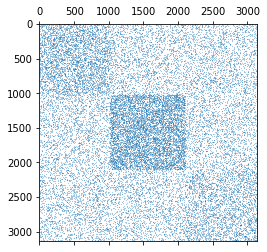

### Question 13

Check the properties you expected to be similar, and compare to your network.

In [ ]:
# Your code here.

Are the results what you expected? Explain.

**Your answer here.**